In [94]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier, PassiveAggressiveClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support as score

In [ ]:
df = pd.read_csv('speech_data.csv')
x = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

# SVM (Linear Kernel)

In [ ]:
n_folds = 5
clf_cv = SVC(kernel = 'linear')
cv_results = cross_validate(clf_cv, x, y, cv=n_folds, scoring = ('accuracy', 'recall_micro', 'precision_micro'))

print('Acc: ', cv_results['test_accuracy'].sum()/n_folds)
print('Recall: ', cv_results['test_recall_micro'].sum()/n_folds)
print('Precision: ', cv_results['test_precision_micro'].sum()/n_folds)

Acc:  0.9574074074074075
Recall:  0.9574074074074075
Precision:  0.9574074074074075


In [ ]:
clf = SVC(kernel = 'linear')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        22
           2       0.84      1.00      0.91        16
           3       0.90      1.00      0.95        18
           4       1.00      1.00      1.00        19
           5       1.00      0.89      0.94        18
           6       1.00      0.80      0.89        15

    accuracy                           0.95       108
   macro avg       0.96      0.95      0.95       108
weighted avg       0.96      0.95      0.95       108



# SVM (Radial Kernel)

In [ ]:
n_folds = 5
clf_cv = SVC(kernel = 'rbf')
cv_results = cross_validate(clf_cv, x, y, cv=n_folds, scoring = ('accuracy', 'recall_micro', 'precision_micro'))

print('Acc: ', cv_results['test_accuracy'].sum()/n_folds)
print('Recall: ', cv_results['test_recall_micro'].sum()/n_folds)
print('Precision: ', cv_results['test_precision_micro'].sum()/n_folds)

Acc:  0.8944444444444445
Recall:  0.8944444444444445
Precision:  0.8944444444444445


In [ ]:
clf = SVC(kernel = 'rbf')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        22
           2       0.78      0.88      0.82        16
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        18
           6       0.85      0.73      0.79        15

    accuracy                           0.94       108
   macro avg       0.94      0.93      0.93       108
weighted avg       0.95      0.94      0.94       108



# Gradient Boosting Classifier

In [ ]:
n_folds = 5
clf_cv = GradientBoostingClassifier(criterion='friedman_mse')
cv_results = cross_validate(clf_cv, x, y, cv=n_folds, scoring = ('accuracy', 'recall_micro', 'precision_micro'))

print('Acc: ', cv_results['test_accuracy'].sum()/n_folds)
print('Recall: ', cv_results['test_recall_micro'].sum()/n_folds)
print('Precision: ', cv_results['test_precision_micro'].sum()/n_folds)

Acc:  0.8425925925925926
Recall:  0.8425925925925926
Precision:  0.8425925925925926


In [ ]:
clf = GradientBoostingClassifier(criterion='friedman_mse')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.95      0.95      0.95        22
           2       0.88      0.94      0.91        16
           3       0.92      0.67      0.77        18
           4       0.75      0.95      0.84        19
           5       0.94      0.89      0.91        18
           6       0.87      0.87      0.87        15

    accuracy                           0.88       108
   macro avg       0.89      0.88      0.88       108
weighted avg       0.89      0.88      0.88       108



# Stochastic Gradient Descent Classifier

In [ ]:
n_folds = 5
clf_cv = SGDClassifier(loss="hinge", max_iter=1000)
cv_results = cross_validate(clf_cv, x, y, cv=n_folds, scoring = ('accuracy', 'recall_micro', 'precision_micro'))

print('Acc: ', cv_results['test_accuracy'].sum()/n_folds)
print('Recall: ', cv_results['test_recall_micro'].sum()/n_folds)
print('Precision: ', cv_results['test_precision_micro'].sum()/n_folds)

Acc:  0.9092592592592593
Recall:  0.9092592592592593
Precision:  0.9092592592592593


In [ ]:
clf = SGDClassifier(loss="hinge", max_iter=1000)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.95      0.98        22
           2       0.80      1.00      0.89        16
           3       0.89      0.94      0.92        18
           4       0.90      1.00      0.95        19
           5       1.00      0.89      0.94        18
           6       1.00      0.73      0.85        15

    accuracy                           0.93       108
   macro avg       0.93      0.92      0.92       108
weighted avg       0.94      0.93      0.93       108



# K-Nearest Neighbors

In [ ]:
n_folds = 5
clf_cv = KNeighborsClassifier(n_neighbors=10)
cv_results = cross_validate(clf_cv, x, y, cv=n_folds, scoring = ('accuracy', 'recall_micro', 'precision_micro'))

print('Acc: ', cv_results['test_accuracy'].sum()/n_folds)
print('Recall: ', cv_results['test_recall_micro'].sum()/n_folds)
print('Precision: ', cv_results['test_precision_micro'].sum()/n_folds)

Acc:  0.9185185185185185
Recall:  0.9185185185185185
Precision:  0.9185185185185185


In [ ]:
clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        22
           2       0.80      1.00      0.89        16
           3       0.94      0.94      0.94        18
           4       1.00      1.00      1.00        19
           5       1.00      0.94      0.97        18
           6       0.92      0.73      0.81        15

    accuracy                           0.94       108
   macro avg       0.94      0.94      0.94       108
weighted avg       0.95      0.94      0.94       108



# Random Forest Classifier

In [ ]:
n_folds = 5
clf_cv = RandomForestClassifier()
cv_results = cross_validate(clf_cv, x, y, cv=n_folds, scoring = ('accuracy', 'recall_micro', 'precision_micro'))

print('Acc: ', cv_results['test_accuracy'].sum()/n_folds)
print('Recall: ', cv_results['test_recall_micro'].sum()/n_folds)
print('Precision: ', cv_results['test_precision_micro'].sum()/n_folds)

Acc:  0.8685185185185185
Recall:  0.8685185185185185
Precision:  0.8685185185185185


In [ ]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        22
           2       0.93      0.88      0.90        16
           3       0.94      0.94      0.94        18
           4       0.95      0.95      0.95        19
           5       0.95      1.00      0.97        18
           6       0.87      0.87      0.87        15

    accuracy                           0.94       108
   macro avg       0.94      0.94      0.94       108
weighted avg       0.94      0.94      0.94       108



# Passive Agressive Classifier

In [ ]:
n_folds = 5
clf_cv = PassiveAggressiveClassifier()
cv_results = cross_validate(clf_cv, x, y, cv=n_folds, scoring = ('accuracy', 'recall_micro', 'precision_micro'))

print('Acc: ', cv_results['test_accuracy'].sum()/n_folds)
print('Recall: ', cv_results['test_recall_micro'].sum()/n_folds)
print('Precision: ', cv_results['test_precision_micro'].sum()/n_folds)

Acc:  0.9444444444444444
Recall:  0.9444444444444444
Precision:  0.9444444444444444


In [ ]:
clf = PassiveAggressiveClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.95      0.98        22
           2       0.84      1.00      0.91        16
           3       0.89      0.94      0.92        18
           4       0.90      1.00      0.95        19
           5       1.00      0.89      0.94        18
           6       1.00      0.80      0.89        15

    accuracy                           0.94       108
   macro avg       0.94      0.93      0.93       108
weighted avg       0.94      0.94      0.94       108



#Quadratic Discriminant Analysis

In [ ]:
n_folds = 5
clf_cv= QuadraticDiscriminantAnalysis()
cv_results = cross_validate(clf_cv, x, y, cv=n_folds, scoring = ('accuracy', 'recall_micro', 'precision_micro'))

print('Acc: ', cv_results['test_accuracy'].sum()/n_folds)
print('Recall: ', cv_results['test_recall_micro'].sum()/n_folds)
print('Precision: ', cv_results['test_precision_micro'].sum()/n_folds)

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Acc:  0.1759259259259259
Recall:  0.1759259259259259
Precision:  0.1759259259259259


In [ ]:
clf = QuadraticDiscriminantAnalysis()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


              precision    recall  f1-score   support

           1       0.00      0.00      0.00        22
           2       0.11      0.12      0.11        16
           3       0.11      0.11      0.11        18
           4       0.17      0.26      0.21        19
           5       0.06      0.06      0.06        18
           6       0.13      0.13      0.13        15

    accuracy                           0.11       108
   macro avg       0.10      0.11      0.10       108
weighted avg       0.09      0.11      0.10       108



#MLP Classifier

In [ ]:
n_folds = 5
clf_cv= MLPClassifier()
cv_results = cross_validate(clf_cv, x, y, cv=n_folds, scoring = ('accuracy', 'recall_micro', 'precision_micro'))

print('Acc: ', cv_results['test_accuracy'].sum()/n_folds)
print('Recall: ', cv_results['test_recall_micro'].sum()/n_folds)
print('Precision: ', cv_results['test_precision_micro'].sum()/n_folds)

Acc:  0.7037037037037036
Recall:  0.7037037037037036
Precision:  0.7037037037037036


In [ ]:
clf = MLPClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.91      0.95        22
           2       1.00      1.00      1.00        16
           3       0.89      0.94      0.92        18
           4       0.90      1.00      0.95        19
           5       1.00      0.89      0.94        18
           6       0.88      0.93      0.90        15

    accuracy                           0.94       108
   macro avg       0.95      0.95      0.94       108
weighted avg       0.95      0.94      0.94       108



#Linear Discriminant Analysis

In [ ]:
n_folds = 5
clf_cv= LinearDiscriminantAnalysis()
cv_results = cross_validate(clf_cv, x, y, cv=n_folds, scoring = ('accuracy', 'recall_micro', 'precision_micro'))

print('Acc: ', cv_results['test_accuracy'].sum()/n_folds)
print('Recall: ', cv_results['test_recall_micro'].sum()/n_folds)
print('Precision: ', cv_results['test_precision_micro'].sum()/n_folds)

Acc:  0.9351851851851851
Recall:  0.9351851851851851
Precision:  0.9351851851851851


In [ ]:
clf = LinearDiscriminantAnalysis()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        22
           2       0.83      0.94      0.88        16
           3       1.00      0.89      0.94        18
           4       1.00      1.00      1.00        19
           5       0.90      1.00      0.95        18
           6       0.92      0.80      0.86        15

    accuracy                           0.94       108
   macro avg       0.94      0.94      0.94       108
weighted avg       0.95      0.94      0.94       108



#Optimización de los modelos de clasificación
Para esta parte buscaremos optimizar los parámetros de los clasificadores K-Nearest Neighbors y Stochastic Gradient Descent Classifier, esto porque resultaron con buenos scores y todavía tienen buen rango de mejora

###K-Nearest-Neighbors

In [ ]:
knn_opt = KNeighborsClassifier()
knn_opt.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

El parámetro n_neighbors es el que indica el número de vecinos cercanos a la observación que entran para la clasificació. Haremos un gridsearch para este parámetro con un rango de 2 hasta 23, esto por ser cercano a la raíz cuadrada de nuestro número de observaciones total

In [ ]:
parameter_grid = {"n_neighbors": np.arange(1,24)}

In [ ]:
knn_tune_grid = GridSearchCV(estimator = knn_opt,
                             param_grid = parameter_grid,
                             cv = 5, error_score='raise',
                             return_train_score = True,
                             scoring = 'accuracy')

Encontrar valor óptimo del parámetro n_neighbors

In [ ]:
knn_tuned = knn_tune_grid.fit(x_train, y_train)
knn_tune_grid.best_params_

{'n_neighbors': 3}

In [ ]:
knn_n_results = knn_tune_grid.cv_results_


print("Promedio de accuracies por cada número de vecinos:")
for mean_score, params in zip(knn_n_results['mean_test_score'], knn_n_results['params']):
    print(f"{params}: {mean_score:.4f}")

Promedio de accuracies por cada número de vecinos:
{'n_neighbors': 1}: 0.9676
{'n_neighbors': 2}: 0.9584
{'n_neighbors': 3}: 0.9723
{'n_neighbors': 4}: 0.9561
{'n_neighbors': 5}: 0.9607
{'n_neighbors': 6}: 0.9515
{'n_neighbors': 7}: 0.9537
{'n_neighbors': 8}: 0.9376
{'n_neighbors': 9}: 0.9514
{'n_neighbors': 10}: 0.9376
{'n_neighbors': 11}: 0.9400
{'n_neighbors': 12}: 0.9261
{'n_neighbors': 13}: 0.9330
{'n_neighbors': 14}: 0.9238
{'n_neighbors': 15}: 0.9307
{'n_neighbors': 16}: 0.9261
{'n_neighbors': 17}: 0.9261
{'n_neighbors': 18}: 0.9191
{'n_neighbors': 19}: 0.9145
{'n_neighbors': 20}: 0.9122
{'n_neighbors': 21}: 0.9099
{'n_neighbors': 22}: 0.8982
{'n_neighbors': 23}: 0.8983


Text(0, 0.5, 'Accuracy con test split')

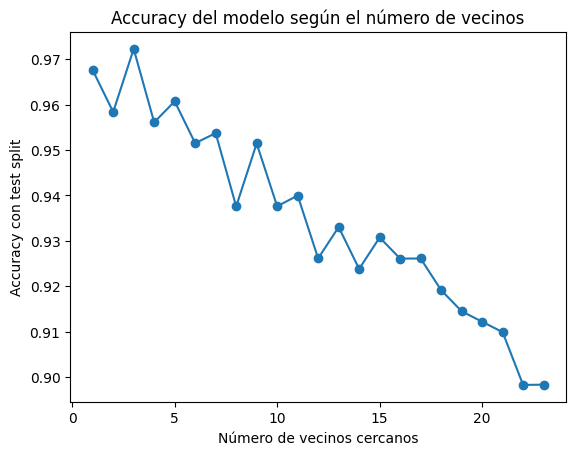

In [ ]:
plt.plot(np.arange(1,24), knn_n_results['mean_test_score'], '-o')
plt.title('Accuracy del modelo según el número de vecinos')
plt.xlabel('Número de vecinos cercanos')
plt.ylabel('Accuracy con test split')

Como podemos observar, efectivamente el modelo alcanza un pico cuando el número de vecinos cercanos es 3 con un accuracy de 0.97

###Stochastic Gradient Descent



In [ ]:
sgd_opt = SGDClassifier(loss="hinge")
sgd_opt.get_params()

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

max_iter limita el número de épocas con las que se entrenará el modelo, por default son 1000. Tiene un rango de $[1,\infty)$. fit_intercept es un parámetro con valores True o False, define si el modelo buscará el intercepto o si asume que ya están centrados los datos. Haremos un gridsearch donde iteraremos para max_iter desde 500, hasta 2000 con pasos de 100 épocas y a su vez con fit_intercept activado o desactivado

In [ ]:
parameter_grid = {"max_iter": np.arange(500,2100,100), "fit_intercept": [True, False]}

In [ ]:
sgd_tune_grid = GridSearchCV(estimator = sgd_opt,
                             param_grid = parameter_grid,
                             cv = 5, error_score='raise',
                             return_train_score = True,
                             scoring = 'accuracy')

Encontrar valor óptimo del parámetros max_iter y shuffle

In [ ]:
sgd_tuned = sgd_tune_grid.fit(x_train, y_train)
sgd_tune_grid.best_params_

{'fit_intercept': False, 'max_iter': 800}

In [ ]:
sgd_results = sgd_tune_grid.cv_results_


print("Promedio de accuracies por combinación de max_iter y shuffle:")
for mean_score, params in zip(sgd_results['mean_test_score'], sgd_results['params']):
    print(f"{params}: {mean_score:.4f}")

Promedio de accuracies por combinación de max_iter y shuffle:
{'fit_intercept': True, 'max_iter': 500}: 0.9353
{'fit_intercept': True, 'max_iter': 600}: 0.9146
{'fit_intercept': True, 'max_iter': 700}: 0.9191
{'fit_intercept': True, 'max_iter': 800}: 0.9168
{'fit_intercept': True, 'max_iter': 900}: 0.9307
{'fit_intercept': True, 'max_iter': 1000}: 0.8824
{'fit_intercept': True, 'max_iter': 1100}: 0.9168
{'fit_intercept': True, 'max_iter': 1200}: 0.9214
{'fit_intercept': True, 'max_iter': 1300}: 0.9399
{'fit_intercept': True, 'max_iter': 1400}: 0.9306
{'fit_intercept': True, 'max_iter': 1500}: 0.9168
{'fit_intercept': True, 'max_iter': 1600}: 0.9400
{'fit_intercept': True, 'max_iter': 1700}: 0.9237
{'fit_intercept': True, 'max_iter': 1800}: 0.9307
{'fit_intercept': True, 'max_iter': 1900}: 0.9353
{'fit_intercept': True, 'max_iter': 2000}: 0.9377
{'fit_intercept': False, 'max_iter': 500}: 0.9283
{'fit_intercept': False, 'max_iter': 600}: 0.9213
{'fit_intercept': False, 'max_iter': 700}: 

In [ ]:
df_sgd = pd.DataFrame(sgd_results)

Text(0, 0.5, 'Accuracy con test split')

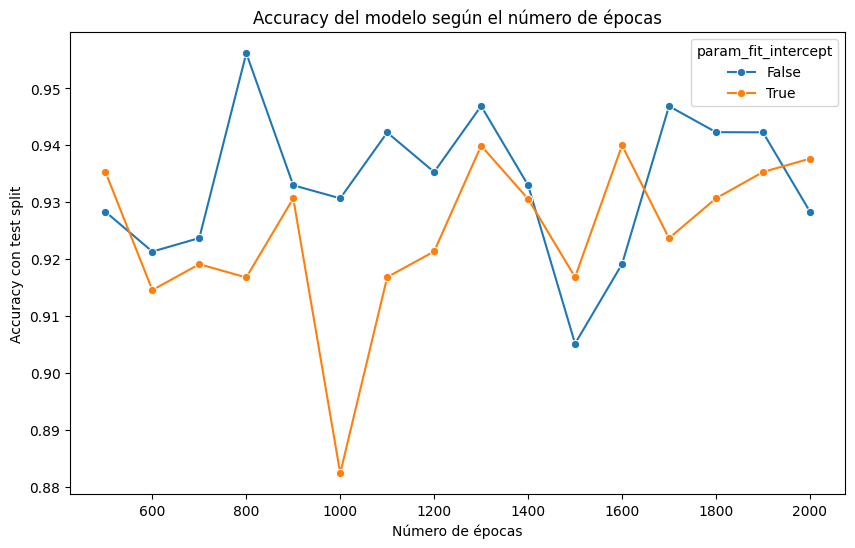

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_sgd, x = 'param_max_iter', y='mean_test_score', hue='param_fit_intercept', marker='o')

plt.title('Accuracy del modelo según el número de épocas')
plt.xlabel('Número de épocas')
plt.ylabel('Accuracy con test split')

Como podemos observar el modelo alcanza su mejor accuracy cuando el fit_intercept está apagado y el número de épocas es 800. Esto nos dice que no hace falta entrenar con muchas más épocas y que el modelo se ajusta mejor si asume que los datos ya están centrados

#Feature selection
Para los modelos optimizados anteriores, haremos un wrapper para encontrar los menos parámetros que mejor predigan la variable de interés

wrapper para k_neighbors classifier

Filter con 1 features seleccionadas 

Variables seleccionadas:  ['1966'] 

Clasificaction report: 

              precision    recall  f1-score   support

           1       0.25      0.44      0.32        18
           2       0.47      0.41      0.44        22
           3       0.25      0.46      0.32        13
           4       0.25      0.12      0.16        17
           5       0.40      0.20      0.27        20
           6       0.20      0.17      0.18        18

    accuracy                           0.30       108
   macro avg       0.30      0.30      0.28       108
weighted avg       0.32      0.30      0.29       108

Filter con 2 features seleccionadas 

Variables seleccionadas:  ['1463' '1966'] 

Clasificaction report: 

              precision    recall  f1-score   support

           1       0.54      0.83      0.65        18
           2       0.41      0.32      0.36        22
           3       0.45      0.77      0.57        13
           4       0.44      0.24

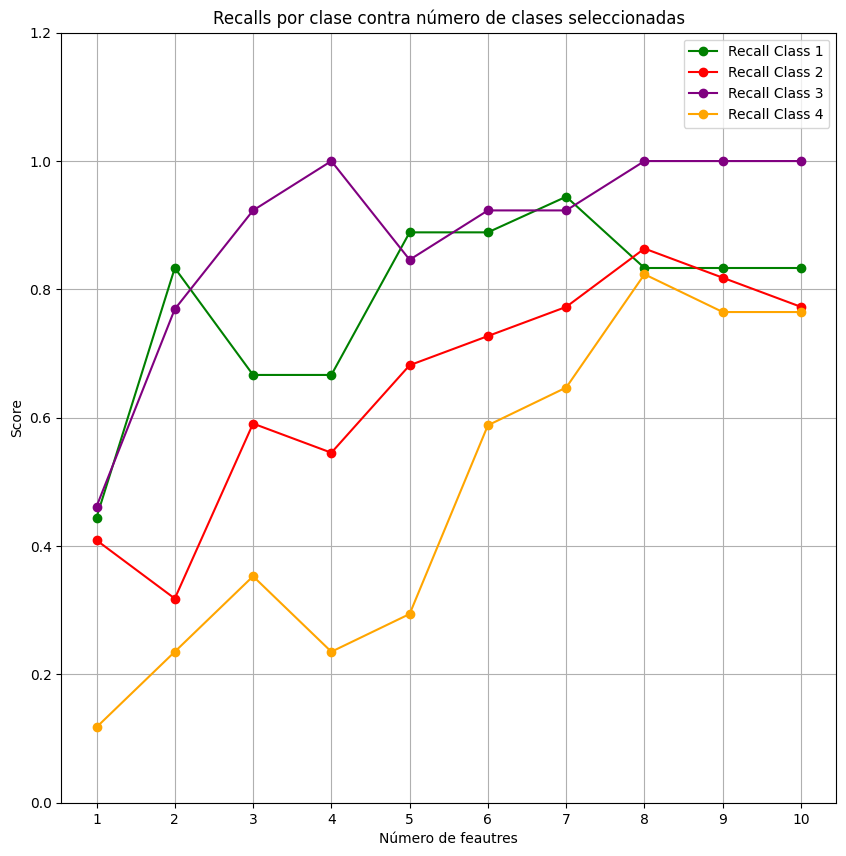

In [91]:
from sklearn.feature_selection import SequentialFeatureSelector
recalls1_w = []
recalls2_w = []
recalls3_w = []
recalls4_w = []
recalls5_w = []
recalls6_w = []

for features in range(1,11):
  clf_w = KNeighborsClassifier(n_neighbors =   3)
  filter = SequentialFeatureSelector(clf_w, n_features_to_select= features)
  x_reduced = filter.fit_transform(x,y)


  print(f"Filter con {features} features seleccionadas \n")
  print("Variables seleccionadas: ", filter.get_feature_names_out(), "\n")

  x_train, x_test, y_train, y_test = train_test_split(x_reduced,y, test_size = 0.20, random_state= 3)

  clf_w.fit(x_train, y_train)

  y_pred = clf_w.predict(x_test)
  print("Clasificaction report: \n")
  print(classification_report(y_test, y_pred))

  precision,recall,fscore,support = score(y_test,y_pred)

  recalls1_w.append(recall[0])
  recalls2_w.append(recall[1])
  recalls3_w.append(recall[2])
  recalls4_w.append(recall[3])
  recalls5_w.append(recall[4])
  recalls6_w.append(recall[5])
  steps = np.arange(1, 11)

plt.figure(figsize=(10, 10))

plt.plot(steps, recalls1_w, label='Recall Class 1', marker='o', color='green')
plt.plot(steps, recalls2_w, label='Recall Class 2', marker='o', color='red')
plt.plot(steps, recalls3_w, label='Recall Class 3', marker='o', color='purple')
plt.plot(steps, recalls4_w, label='Recall Class 4', marker='o', color='orange')
plt.xlabel('Número de feautres')
plt.ylabel('Score')
plt.title('Recalls por clase contra número de clases seleccionadas')
plt.ylim(0, 1.2)
plt.xticks(steps)
plt.legend()
plt.grid(True)
plt.show()

Filter para SGDClassifier

In [99]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import precision_recall_fscore_support as score

recalls1 = []
recalls2 = []
recalls3 = []
recalls4 = []
recalls5 = []
recalls6 = []

for kbest in range(10,110,10):

  filter = SelectKBest(mutual_info_classif,  k = kbest)
  x_reduced = filter.fit_transform(x,y)
  x_train, x_test, y_train, y_test = train_test_split(x_reduced,y, test_size = 0.20, random_state= 3)

  print(f"Filter con {kbest} mejores features \n")
  print("Variables seleccionadas: ", filter.get_feature_names_out(), "\n")

  clf_filter = SGDClassifier(loss = 'hinge', max_iter = 800,fit_intercept = False )
  clf_filter.fit(x_train, y_train)

  y_pred = clf_filter.predict(x_test)
  print("Clasificaction report: \n")
  report = classification_report(y_test, y_pred)
  print(report)

  precision,recall,fscore,support = score(y_test,y_pred)


  recalls1.append(recall[0])
  recalls2.append(recall[1])
  recalls3.append(recall[2])
  recalls4.append(recall[3])
  recalls5.append(recall[4])
  recalls6.append(recall[5])

Filter con 10 mejores features 

Variables seleccionadas:  ['1554' '1875' '1877' '1888' '1914' '1953' '1966' '1979' '1992' '2005'] 

Clasificaction report: 

              precision    recall  f1-score   support

           1       0.67      0.11      0.19        18
           2       0.67      0.64      0.65        22
           3       0.56      0.38      0.45        13
           4       0.55      0.35      0.43        17
           5       0.24      0.75      0.37        20
           6       0.50      0.06      0.10        18

    accuracy                           0.40       108
   macro avg       0.53      0.38      0.37       108
weighted avg       0.53      0.40      0.37       108

Filter con 20 mejores features 

Variables seleccionadas:  ['1489' '1515' '1554' '1619' '1864' '1875' '1877' '1888' '1914' '1916'
 '1927' '1940' '1953' '1955' '1966' '1968' '1979' '1992' '2005' '2252'] 

Clasificaction report: 

              precision    recall  f1-score   support

           1   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Filter con 30 mejores features 

Variables seleccionadas:  ['1450' '1463' '1489' '1515' '1554' '1568' '1619' '1632' '1684' '1864'
 '1875' '1877' '1888' '1890' '1914' '1916' '1919' '1927' '1940' '1953'
 '1955' '1966' '1968' '1979' '1992' '1994' '2005' '2096' '2213' '2252'] 

Clasificaction report: 

              precision    recall  f1-score   support

           1       0.34      0.61      0.44        18
           2       0.67      0.27      0.39        22
           3       0.41      0.92      0.57        13
           4       0.00      0.00      0.00        17
           5       0.33      0.30      0.32        20
           6       0.37      0.39      0.38        18

    accuracy                           0.39       108
   macro avg       0.35      0.42      0.35       108
weighted avg       0.37      0.39      0.34       108

Filter con 40 mejores features 

Variables seleccionadas:  ['1450' '1463' '1489' '1515' '1541' '1554' '1568' '1619' '1632' '1684'
 '1763' '1776' '1838' '1841

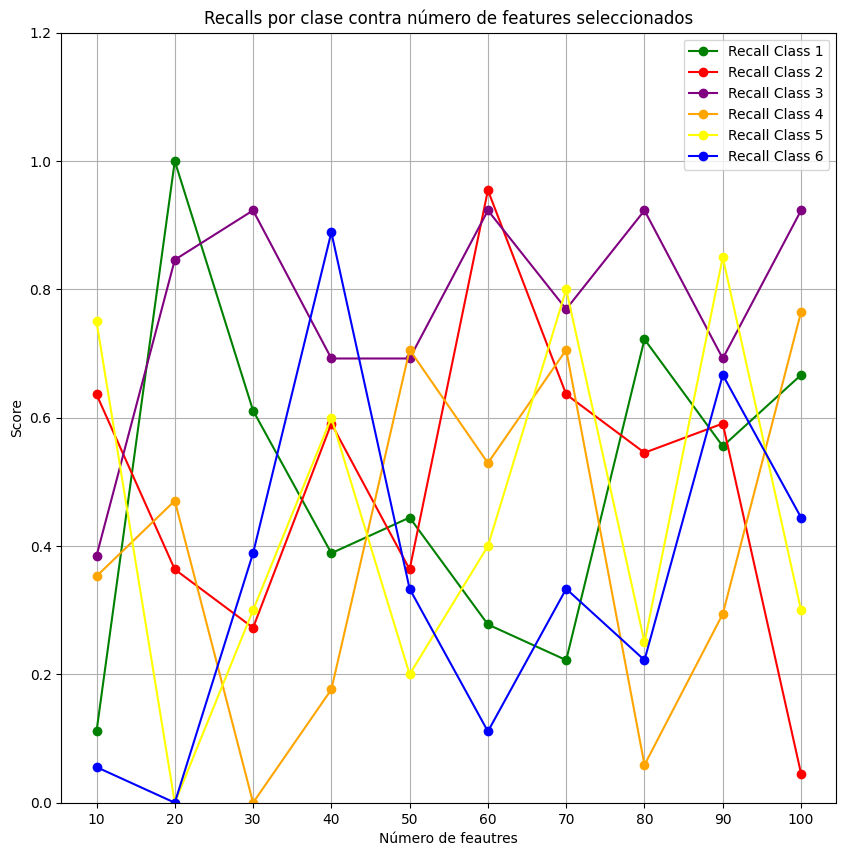

In [107]:
steps = np.arange(10, 101, 10)
plt.figure(figsize=(10, 10))

plt.plot(steps, recalls1, label='Recall Class 1', marker='o', color='green')
plt.plot(steps, recalls2, label='Recall Class 2', marker='o', color='red')
plt.plot(steps, recalls3, label='Recall Class 3', marker='o', color='purple')
plt.plot(steps, recalls4, label='Recall Class 4', marker='o', color='orange')
plt.plot(steps, recalls5, label='Recall Class 5', marker='o', color='yellow')
plt.plot(steps, recalls6, label='Recall Class 6', marker='o', color='blue')
plt.xlabel('Número de feautres')
plt.ylabel('Score')
plt.title('Recalls por clase contra número de features seleccionados')
plt.ylim(0, 1.2)
plt.xticks(steps)
plt.legend()
plt.grid(True)
plt.show()